In [1]:
import time
import os
import numpy as np
import torch
from torch.utils.data import random_split
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from google.colab import drive
import os
import torch.nn as nn
drive.mount('/content/gdrive')
torch.manual_seed(0)

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#import os
from torchvision import datasets, models, transforms



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#!unzip '/content/gdrive/MyDrive/aps360/example.zip' -d '/root/datasets'

Archive:  /content/gdrive/MyDrive/aps360/example.zip
  inflating: /root/datasets/example/animal_ex.jpg  
  inflating: /root/datasets/example/ex_3.jpg  
  inflating: /root/datasets/example/ex4.jpg  
  inflating: /root/datasets/example/ex5.jpg  
  inflating: /root/datasets/example/example.jpg  


In [ ]:
#how to transform portions of the training data. 

#data_transform = transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor()])
#train_set = datasets.ImageFolder(train_dir, transform=data_transform)

In [ ]:
classes = ['example']
'''gesture_dir = '/root/datasets/Lab3_Gestures_Summer'
train_dir = '/root/datasets/splitted/train'
val_dir = '/root/datasets/splitted/val'
test_dir = '/root/datasets/splitted/test''''

In [ ]:
'''import Augmentor


p = Augmentor.Pipeline("/root/datasets/example")
p.rotate(probability=0.75, max_left_rotation=1, max_right_rotation=15)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

p.sample(3)'''

In [50]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [60]:
from torchvision.transforms.functional import hflip
augmented_train_data = []

rotate_90 = transforms.Compose([
    transforms.RandomRotation(90),
    transforms.ToTensor()])

rotate_180 = transforms.Compose([
    transforms.RandomRotation(180),
    transforms.ToTensor()])

rotate_270 = transforms.Compose([
    transforms.RandomRotation(270),
    transforms.ToTensor()])

flipped = transforms.Compose([
    transforms.RandomHorizontalFlip(1), 
    transforms.ToTensor()])
noise = transforms.Compose([transforms.ToTensor(),
    AddGaussianNoise(0., 1.)
    ])

In [ ]:
#1. Split the dataset into 5 groups
#or portion dealing with the dataset

In [ ]:
import glob


(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(360, 480, 3)
(720, 1280, 3)


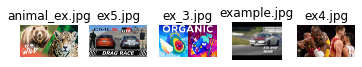

In [52]:
import os
from os.path import join
import cv2

test = []

dir = "directory of dataset" #put the directory in here


#print original images for checking
'''
img = []
for classes in os.listdir(dir):
  imgs_dir = join(dir,classes)
  k=0
  for imgs in os.listdir(imgs_dir):
    img = plt.imread(join(imgs_dir,imgs))
    plt.subplot(5,5,k+1)
    plt.title(imgs)
    plt.axis('off')
    plt.imshow(img)
    print(img.shape)
    k+=1'''

In [18]:
#check cut function
'''import math
a=(math.floor(5/3))
for i in range(1,5):
  print(i*a)'''

1
2
3
4


In [57]:
# load the images as 1d array
import os
from os.path import join
from PIL import Image
import math

# from wand.image import Image

conversion=transforms.ToTensor

augmented_train_label=[]

train_dir=path
train_img = []
train_labels = []
for class_name in os.listdir(train_dir): # loop through each directory
  img_dir = join(train_dir,class_name)
  for img_name in os.listdir(img_dir):
    img_path = join(img_dir, img_name)
    train_img.append(Image.open(img_path))
    train_labels.append(class_name)
#print(train_img)

cut = math.floor(len(train_img)/5)
for i in range(0,cut*1):
  augmented_train_label.append(rotate_90(train_img[i]))
for i in range(cut*1,cut*2):
  augmented_train_label.append(rotate_180(train_img[i]))
for i in range(cut*2,cut*3):
  augmented_train_label.append(rotate_270(train_img[i]))
for i in range(cut*3,cut*4):
  augmented_train_label.append(flipped(train_img[i]))
for i in range(cut*4,len(train_img)):
  augmented_train_label.append(noise(train_img[i]))

# augmented_train_label: tensor array
# augmented data stored in augmented_train_label[]
# the labels/cateories for the augmented images (now stored as tensors), stored in train_labels[]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FC1AB7203D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FC1AB736F90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FC1AB60CAD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360 at 0x7FC1AB60C550>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FC1AB60C9D0>]


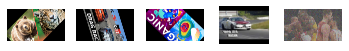

In [58]:


#print checking if data had been augmented
for foo in augmented_train_label:
    ig = np.transpose(foo,(1,2,0))
    plt.subplot(5,5,k+1)
    plt.axis('off')
    plt.imshow(ig)
    k+=1

In [ ]:
'''import itertools


train_dir='/root/datasets/example'
train_img = []
train_labels = []
for img_name in os.listdir(train_dir): # loop through each directory
  img_dir = os.path.join(train_dir, img_name)
  #print(img_name)
  img_orig=plt.imread(img_dir)
  image_orig = image_orig.tolist()
  pixel_list = list(itertools.chain.from_iterable(image_orig))

  train_img.append(pixel_list)

for i in range(5):
  if i==0:
    

  if (img_name==0):
      data_90=datasets.ImageFolder(img_path, transform=rotate_90)
      augmented_train_data.append(data_90)
      augmented_train_label.append(img_name)
  elif (img_name==1):
      data_180=datasets.ImageFolder(img_path, transform=rotate_180)
      augmented_train_data.append(data_180)
      augmented_train_label.append(img_name)

  elif (img_name==2):
      data_270=datasets.ImageFolder(img_path,transform=rotate_270)
      augmented_train_data.append(data_270)
      augmented_train_label.append(img_name)

  elif (img_name==3):
      data_flipped=datasets.ImageFolder(img_path,transform=flipped)
      augmented_train_data.append(data_flipped)
      augmented_train_label.append(img_name)

  elif (img_name==4):
      noisy=plt.imread(img_path).noise("poisson", attenuate=0.9)
      augmented_train_data.append(conversion(noisy))
      augmented_train_label.append(img_name)

#print(augmented_train_data)
#print(augmented_train_label)'''

IndentationError: ignored